In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-02 18:26:05.494163: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-02 18:26:05.524284: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-02 18:26:05.991324: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')

df_Camaroes = df[['Ano','Cam_sete_barbas_ind', 'Cam_branco_ind', 'Cam_rosa_ind', 'Cam_barba_ruca_ind','Cam_santana_ind','Cam_crista_ind']].dropna().reset_index(drop=True)


dados = df_Camaroes[['Ano','Cam_crista_ind']]
for i in range(len(dados['Ano'])):
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_sete_barbas_ind']+df_Camaroes.loc[i,'Cam_branco_ind']+df_Camaroes.loc[i,'Cam_rosa_ind']+df_Camaroes.loc[i, 'Cam_barba_ruca_ind']+df_Camaroes.loc[i, 'Cam_santana_ind']+df_Camaroes.loc[i, 'Cam_crista_ind']
  
dados = dados[['Ano','Cam_crista_ind','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Cam_crista_ind'] = dados.loc[i,'Cam_crista_ind'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop = dados['Prop_Cam_crista_ind'].values
dados



/tmp/ipykernel_35623/2336858546.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_sete_barbas_ind']+df_Camaroes.loc[i,'Cam_branco_ind']+df_Camaroes.loc[i,'Cam_rosa_ind']+df_Camaroes.loc[i, 'Cam_barba_ruca_ind']+df_Camaroes.loc[i, 'Cam_santana_ind']+df_Camaroes.loc[i, 'Cam_crista_ind']


,Ano,Cam_crista_ind,Soma,Prop_Cam_crista_ind
0,2015,4.321,113.41400,0.038099
1,2017,1.785,511.54317,0.003489
2,2018,13.111,594.49740,0.022054
3,2019,2.041,883.27950,0.002311
4,2020,0.581,377.16830,0.001540


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std


In [9]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=90, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_crista/pesos prop ind 2010-2022/.weights.h5', overwrite=True)

Epoch 1/90


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0219   
Epoch 2/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9802
Epoch 3/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.9500
Epoch 4/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9195
Epoch 5/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.8854
Epoch 6/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8476
Epoch 7/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8051
Epoch 8/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7525
Epoch 9/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6933
Epoch 10/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6308
Epoch 11/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5659
Epoch 12/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5049
Epoch 13/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4527
Epoch 14/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4112
Epoch 15/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3838
Epoch 16/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms

In [5]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_crista/pesos prop ind 2010-2022/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Previsões dos dados ausentes: [[0.13320364]
 [0.11511047]
 [0.09700429]
 [0.07866327]
 [0.05931784]
 [0.03950355]
 [0.01884445]
 [0.00380956]
 [0.02199507]
 [0.00283355]
 [0.00109148]
 [0.        ]
 [0.        ]]


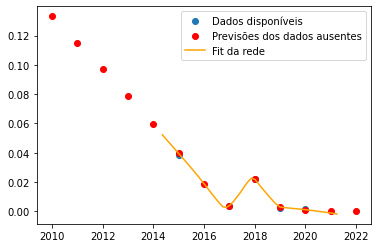

In [10]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

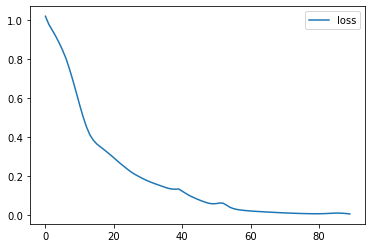

In [11]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [12]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

np.save('prev_continua_Cam_crista_ind 2010-2022',prev_continua)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
